Random Forest Accuracy: 0.7869
Confusion Matrix:
[[ 7  6]
 [ 7 41]]


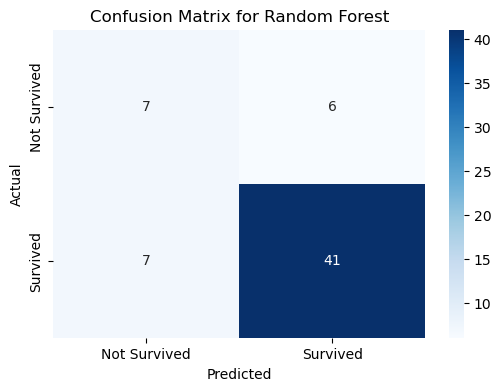

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\titanic.csv", index_col=0)

# 2. 결측치 처리
df.isnull().sum()
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Age의 결측치 평균값으로 대체
df.dropna(inplace=True)  # 나머지 결측치 제거

# 3. 불필요한 컬럼 제거
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# 4. Sex 컬럼 인코딩 (Label Encoding)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 'male'은 0, 'female'은 1로 변환

# 5. 데이터 분리
X = df.drop('Survived', axis=1)  # 특성
y = df['Survived']  # 타겟

# 6. 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Random Forest 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 8. 예측
y_pred = rf_model.predict(X_test)

# 9. 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# 10. 혼동 행렬 (Confusion Matrix) 계산
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# 11. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()